In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import mplhep as hep
plt.style.use(hep.style.CMS)
plt.rcParams.update({'font.size': 32})

In [10]:
z = np.array([250, 270, 290, 310, 330, 350, 370, 390, 410, 430, 450, 470, 490])
bremcount = np.array([74000, 206400, 151000, 75000, 32600, 7604, 2734, 1136, 297, 86, 50, 8, 6])
error = np.sqrt(bremcount)
logbremcount = np.log(bremcount)
logerror = np.log(np.sqrt(bremcount))
def linear(x,a,b):
    return math.log(a)+ b*(x-250)
def exp(x,a,b):
    return a*np.exp(b*(x-250))

[ 6.81215707e+05 -4.93933949e-02]
-20.245621969136092
[[3.74349411e+05            nan]
 [           nan 2.58815716e-03]]
1.0608473386162416


/var/folders/st/_065lwps0278xzjpqz1d38h00000gq/T/ipykernel_6875/4251904487.py:4: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(pcov))


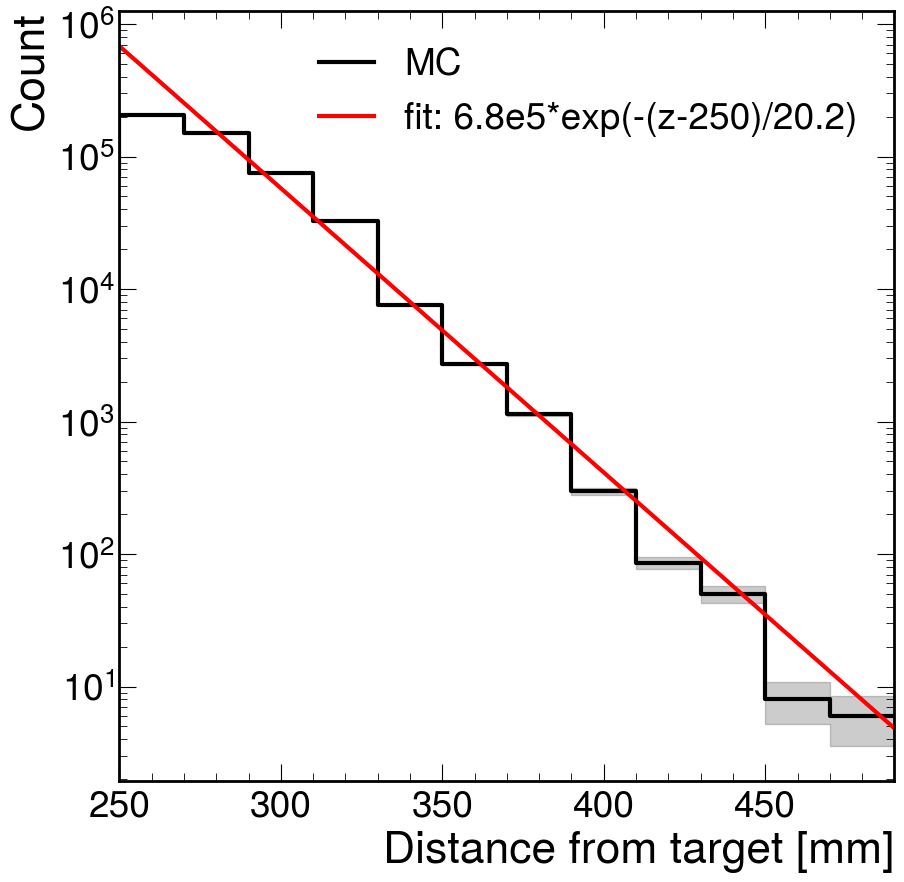

In [11]:
popt, pcov = curve_fit(linear, z, logbremcount, sigma=logerror)
print(popt)
print(1/popt[1])
print(np.sqrt(pcov))
print(np.sqrt(pcov[1][1])/(popt[1])**2)

fig, ax = plt.subplots()
ax.step(z, bremcount, linewidth=3, c='k', label='MC')
ax.fill_between(z, bremcount-error, bremcount+error, step='pre', color='k', alpha=0.2)
ax.plot(z, exp(z, popt[0], popt[1]),linewidth=3, color='r',label='fit: {0}*exp(-(z-250)/{1})'.format('6.8e5', round(-1/popt[1],1)))
ax.legend()
ax.set_xlim((250, 490))
ax.set_xlabel('Distance from target [mm]')
ax.set_ylabel('Count')
ax.set_yscale('log')
plt.show()

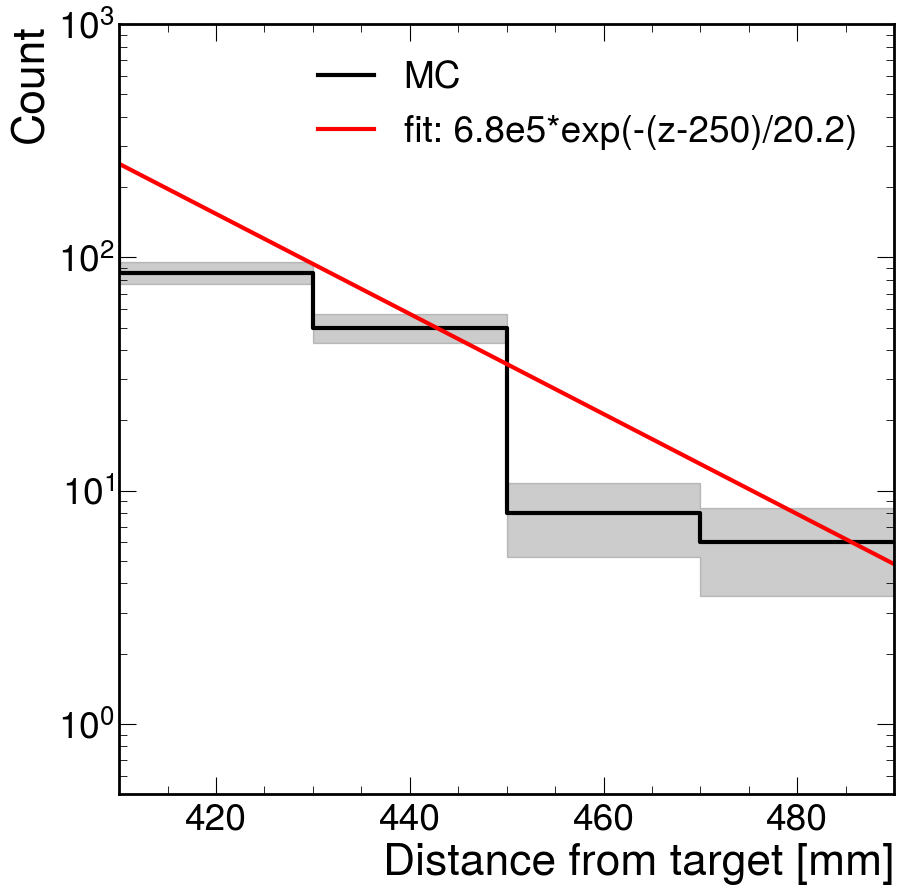

In [4]:
fig, ax = plt.subplots()
ax.step(z, bremcount, linewidth=3, c='k', label='MC')
ax.fill_between(z, bremcount-error, bremcount+error, step='pre', color='k', alpha=0.2)
ax.plot(z, exp(z, popt[0], popt[1]),linewidth=3, color='r',label='fit: {0}*exp(-(z-250)/{1})'.format('6.8e5', round(-1/popt[1],1)))
ax.legend()
ax.set_xlim((410, 490))
ax.set_ylim((0.5, 1000))
ax.set_xlabel('Distance from target [mm]')
ax.set_ylabel('Count')
ax.set_yscale('log')
plt.show()

In [12]:
z = np.array([405., 415., 425., 435., 445., 455., 465., 475., 485., 495., 505., 515., 525., 535.])#, 565.])
#bremcount = np.array([260, 291, 95, 50, 44, 14, 8, 9, 2, 2, 1])
bremcount = np.array([1712, 1881, 765, 326, 373, 105, 62, 64, 15, 16, 11, 2, 2, 3])#, 1])
error = np.sqrt(bremcount)
logbremcount = np.log(bremcount)
logerror = np.log(np.sqrt(bremcount))
def linear(x,a,b):
    return math.log(a)+ b*(x-250)
def exp(x,a,b):
    return a*np.exp(b*(x-250))

In [13]:
popt, pcov = curve_fit(linear, z, logbremcount, sigma=logerror, p0=[ 2.81215707e+06, -5.93933949e-02])
#popt, pcov = curve_fit(linear, z, logbremcount, sigma=logerror, p0=[ 2.81215707e+06, -5.93933949e-02])
print(popt)
print(1/popt[1])
print(np.sqrt(pcov))
print(np.sqrt(pcov[1][1])/(popt[1])**2)

plt.rcParams['figure.dpi'] = 1000

fig, ax = plt.subplots()
ax.step(z, bremcount, linewidth=3, c='k', label='MC')
ax.fill_between(z, bremcount-error, bremcount+error, step='pre', color='k', alpha=0.2)
ax.plot(z, exp(z, popt[0], popt[1]),linewidth=3, color='r',label='fit: {0}*exp(-(z-250)/{1})'.format('2.65e6', round(-1/popt[1],1)))
ax.legend()
ax.set_xlim((405, 545))
ax.set_ylim((0.5, 3000))
ax.set_xlabel('Distance from target [mm]')
ax.set_ylabel('Count')
ax.set_yscale('log')
hep.cms.text(text="Simulation Preliminary", loc=0, ax=ax,
            **{"exp": "LDMX", "exp_weight": "bold", "fontsize": 23, "italic": (True, True)})
plt.show()

[ 2.65088190e+06 -5.12200628e-02]
-19.52359966221516
[[5.59880725e+06            nan]
 [           nan 7.89411018e-03]]
3.00900542675576


/var/folders/st/_065lwps0278xzjpqz1d38h00000gq/T/ipykernel_6875/2835299058.py:5: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(pcov))
